# NAC3 - Aprendizado de maquina

Nesta nac vamos desenvolver um modelo preditivo do valor do carro.


Dica: Siga todas as instruções, completando e construindo os algoritmos necessários.

Nas celulas **Seu Código aqui...** significa que é necessário realizar a implementação de algum código. Utilize quantos blocos julgar necessário para criar o código.

Nas celulas **Responda** significa que é nessário uma resposta clara e objetiva (pode ser por texto, gráfico, imagem...) para a pergunta.


## Informações do grupo

Este projeto poderá ser feito por grupos de `até 2 alunos`.

| Nome dos Integrantes     | RM             | Turma   |
| :----------------------- | :------------- | :-----: |
| Integrante 1             | RM             |         |
| Integrante 2             | RM             |         |


## Data de entrega final

Será considerado para avaliação e correção o ultimo commit do `**dia 16/09/2021**`

Responda o `Google forms` :   [LINK FORMULARIO](https://forms.gle/2iivfbMVToXwe9Wc6).


## Rubrica 

Os critérios de avaliação do projeto será conforme a rubrica.


- R1: Exploração de Dados (Até 1 ponto)
- R2: Preparação de Dados (Até 2 ponto)
- R3: Desenvolvimento do Modelo (Até 2 ponto)
- R4: Treinamento e Teste do Modelo (Até 1 ponto)
- R5: Validação e Otimização do Modelo (Até 2 ponto)
- R6: Conclusões Finais (Até 2 ponto)

Nota_final = R1 + R2 + R3 + R4 + R5 + R6

## 1. Exploração de Dados

Os dados que serão utilizados extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

Carregue o dataset "Automobile.csv" e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv('Automobile.csv')
pd.set_option('display.max_columns', None)
df.head(15)

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,168,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


**Pergunta:** Apresente uma relação das coluna e seu significado:

Exemplo: 

- make: fabricante
- fuel_type: tipo de combustível
- price: preço (**Variável Alvo, atributo que será predito pelo modelo de ML**)

**Resposta**
- symboling:            Nível de risco do seguro 
- normalized_losses:    Perda normalizada (Desvalorização)
- make:                 Fabricante
- fuel_type:            Tipo de combustível
- aspiration:           Aspiração do motor (Padrão, turbo, etc...)
- number_of_doors:      Número de portas
- body_style:           Tipo da carroceria (sedan, hatch, etc..)
- drive_wheels:         Tração do carro (dianteira, traseira, 4x4)
- engine_location:      Localização do motor
- wheel_base:           Distância entre os eixos traseiros e dianteiros
- length:               Comprimento do carro
- width:                Largura do carro
- height:               Altura do carro
- curb_weight:          Peso do carro sem nenhum passageiro ou bagagem
- engine_type:          Tipo do motor
- number_of_cylinders:  Número de cilindros
- engine_size:          Tamanho do motor
- fuel_system:          Sistema de injeção combustível
- bore:                 Diâmetro dos cilindros
- stroke:               Distância dentro do cilindro que o pistão percorre (curso)
- compression_ratio:    Taxa de compressão
- horsepower:           Quantidade de cavalos "potência" do motor
- peak_rpm:             Máximo de RPM
- city_mpg:             Autonomia na cidade
- highway_mpg:          Autonomia na estrada
- price:                Preço (**Target**)








### Análise profunda dos dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos e levante algumas suposições. 

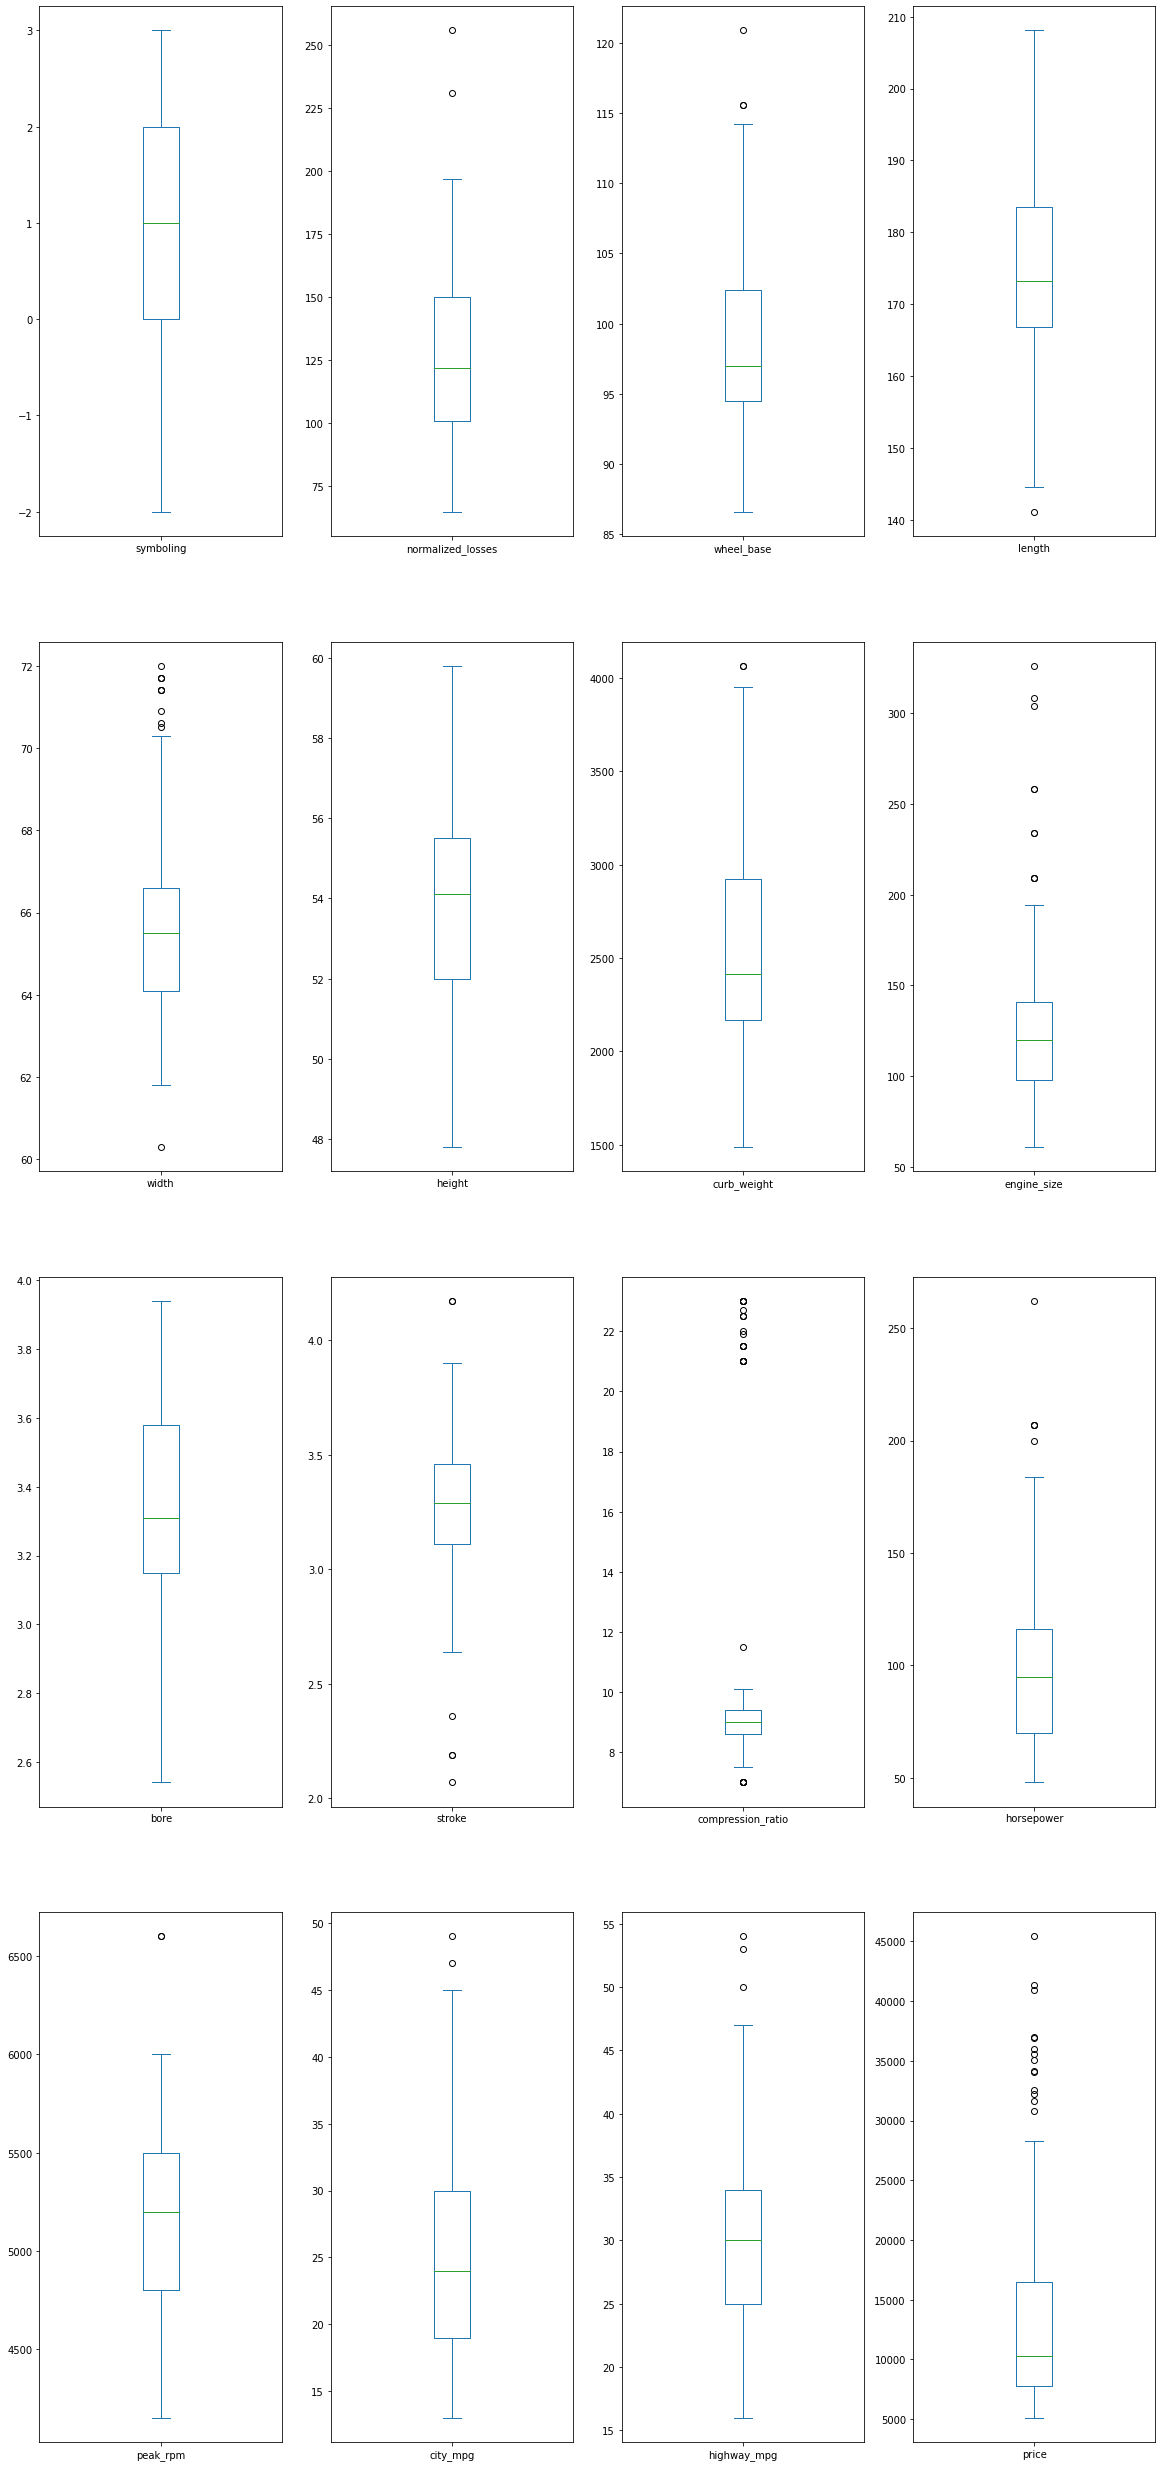

<AxesSubplot:>

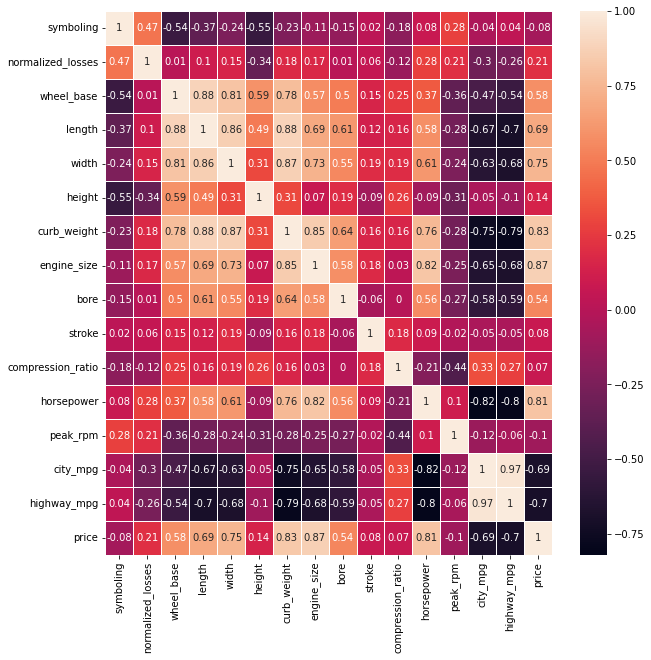

In [54]:
#Seu Código aqui...

import seaborn as sns 

#Tabelas de informações dos dados 
#df.info()
df.describe()

#Gráfico plot-box
df.plot(kind='box', subplots=True, layout=(13,4), sharex=False, sharey=False, figsize=(20, 150))
plt.show()


#Gráfico de correlação
correlation_matrix = df.corr().round(2)
fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)


**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:**


Dado gráfico de correlações, é chamada atenção nos seguintes indicadores:
0.87 | price x engine_size (Tamanho do motor)
0.83 | price x curb_weight (Peso do carro)
0.81 | price x horsepower


- O preço tem queda 
-0.7  | price x highway_mpg (Autonomia na estrada)
-0.69 | price x city_mpg   (Autonomia na cidade)
-0.10 | price x peak_rpm   (Máximo de RPM)


Dado gráfico de correlações entendemos que:

- O preço e a potencia tem correlação fortemente positiva, sendo ela 0.81. Assim quando um cresce o outro tende cresce. 
- Quanto maior o tamanho do motor maior a potencia, visto que a correção de ambos.
- Quanto maior a potencia menor é autonomia dentro e fora da cidade.




## 2. Preparação dos Dados

### Análise de valores inválidos

Faça a análise de dados ausente, dados nulos e dados iguais a 0(zero). **Lembre-se:** Trate esses dados dentro do contexto de análise e justifique suas escolhas.
 

**Resposta:**

In [62]:
#Seu Código aqui...

df.describe()

#df.info()


,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,125.189055,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.329701,3.261741,10.164279,103.263682,5121.393035,25.179104,30.686567,13207.129353
std,1.254802,33.572966,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268166,0.317875,4.004965,37.389372,479.624905,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


### __(BONUS: 1 ponto extra.)__ Análise de Outliers

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

In [7]:
#Seu Código aqui...

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (removidos ou mantidos)? 

**Resposta:**

### Tratamento de dados Paramétricos

Faça o tratamento dos atributos não numéricos. Descubra quais são os atributos não numéricos, faça a análise dos valores desses atributos e manipule de forma conveniente para ser interpretado como um dado numérico. 

In [8]:
#Seu Código aqui...


**Pergunta:** Quais são os atributos não numéricos? Qual o método de análise adotado? Por que esse essa escolha? 

**Resposta:**

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para a determinação do preço de carro? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [ ] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [ ] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 3 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo ...___________ 
2. algoritimo ...___________
3. algoritimo ...___________


**Pergunta:** Explique como cada algoritmo funciona.



**Resposta:**

1. algoritimo ...___________ 
2. algoritimo ...___________
3. algoritimo ...___________

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo.

In [9]:
#Seu Código aqui...



Divida o subset em conjunto de treinamento e teste.

In [10]:
#Seu Código aqui...



## 4. Treinamento e teste do modelo

Faça o treinamento e teste de dos 3 algoritmos escolhidos. Para cada um dos modelos utilize uma das métricas: R2-score, RMSE e MAE para avaliar a performance dos medelos. Utilize a média do obtido da validação cruzada para um kfold de 5.

### Algoritmo 1

In [11]:
#Seu Código aqui...




### Algoritmo 2

In [12]:
#Seu Código aqui...



### Algoritmo 3

In [13]:
#Seu Código aqui...


**Pergunta:** Qual foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:**

## 5. Validação e Otimização do Modelo

Faça a otimização dos modelos, tunning dos hiperparametros, utilize técinicas como **RandomSearchCV** ou **GridSearchCV**.

**Pergunta:** Qual a técnica escolhida? Por que?

**Resposta:**

### Algoritmo 1

In [14]:
#Seu Código aqui...




### Algoritmo 2

In [15]:
#Seu Código aqui...



### Algoritmo 3

In [16]:
#Seu Código aqui...


Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

**Resposta:**

|                     | algoritmo1 | algoritmo2 | algoritmo3 |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |      X           |      X                       |   X              |
| teste  |      X            |      X                       |   X              |


**Pergunta:** Qual dos algoritmos obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:**

### __(BONUS: 1 ponto extra.)__ Implementação do algoritmo otimizado

Configure o modelo selecionado com os parâmetros otimizados obtidos anteriormente.

In [17]:
#Seu Código aqui...



### Modelo de produção: Teste com novos dados

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Defina o teste para um resultado baixo, médio e alto do preço do carro.

In [18]:
#Seu Código aqui...



**Pergunta:** Qual foi o resultado obtido? O resultado está coerente com o esperado?

**Resposta:**

## 6. Conclusões finais

Ufa!!... Chegamos ao final deste projeto. Parabéns! De forma simplificada e completa passamos por todas as etapas de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.

**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**:

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**:

**Pergunta:**: As etapas de desenvolvimento se aplicam para um problema de classificação? Justifique:

**Resposta**: